In [11]:
# 1) Import Libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt
from sklearn. datasets import load_breast_cancer

In [12]:
# 2) Load data
data = load_breast_cancer()
type(data)
X = data.data
y = data.target

In [13]:
# 3) Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# 4) Train Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/opt/anaconda3/envs/ml-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
X_test[:,1]

array([18.6 , 21.31, 19.48, 17.68, 14.44, 29.33, 21.9 , 15.05, 15.86,
       16.62, 25.25, 18.8 , 19.76, 21.88, 12.27, 26.29, 14.7 , 19.59,
       13.43, 20.86, 15.79, 17.72, 22.28, 21.28, 24.49, 10.94, 13.72,
       27.61, 18.84, 24.52, 22.44, 12.74, 19.12, 16.33, 17.53, 18.75,
       23.24, 14.02, 19.98, 24.02, 19.29, 25.74, 16.02, 18.94, 17.36,
       21.26, 13.9 , 27.88, 20.02, 15.7 , 22.07, 25.11, 22.54, 13.17,
       14.65, 18.22, 16.18, 24.91, 20.82, 13.04, 18.  , 21.25, 22.39,
       26.99, 19.02, 23.97, 22.91, 23.97, 17.39, 19.35, 22.29, 17.89,
       17.18, 20.11, 25.49, 14.06, 21.25, 17.05, 14.97, 12.96, 21.54,
       14.78, 21.46, 23.56, 24.48, 17.27, 24.04, 23.33, 22.72, 13.32,
       15.65, 18.75, 16.74, 29.37, 19.86, 16.99, 28.25, 23.75, 13.08,
       25.42, 20.31, 11.97, 16.15, 20.66, 24.21, 17.56, 22.22, 19.83,
       15.18, 16.85, 19.65, 14.93, 27.85, 31.12, 17.33, 26.57, 13.86,
       25.22, 14.88, 27.54, 19.73, 15.39, 17.94, 20.26, 21.8 , 20.52,
       16.67, 18.49,

In [21]:
# 5) Predict probabilities
y_scores = model_lr.predict_proba(X_test)[:, 1]
y_scores

array([8.69530275e-01, 5.01413594e-09, 6.86625598e-03, 9.96599977e-01,
       9.98631640e-01, 5.73146086e-10, 9.49378598e-13, 4.47968737e-03,
       9.96104398e-01, 9.81325825e-01, 9.55602377e-01, 3.27134745e-04,
       9.86586444e-01, 4.73112665e-01, 9.95307323e-01, 1.01858155e-03,
       9.95848212e-01, 9.99689264e-01, 9.94171569e-01, 4.47148015e-07,
       8.42374863e-01, 9.64256501e-01, 1.11388704e-08, 9.93816377e-01,
       9.89120154e-01, 9.99170863e-01, 9.95928546e-01, 9.95649389e-01,
       9.92808530e-01, 1.31559619e-07, 9.96079930e-01, 9.97552768e-01,
       9.64677636e-01, 9.85640382e-01, 9.97926489e-01, 9.96258054e-01,
       2.55695500e-03, 9.79599080e-01, 5.15643334e-06, 9.14222724e-01,
       9.97704477e-01, 1.43819948e-03, 9.99114305e-01, 9.89810501e-01,
       9.97059879e-01, 9.55009578e-01, 9.98086233e-01, 9.83662304e-01,
       9.30648854e-01, 9.95377345e-01, 1.70045371e-04, 2.18756295e-09,
       9.61136234e-01, 9.96676881e-01, 9.98947465e-01, 9.82364739e-01,
      

In [26]:
# 6) Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
print(f"FPR: {fpr}")
print("=="*50)
print(f"TPR: {tpr}")
print("=="*50)
print(f"Thresholds: {thresholds}")

FPR: [0.         0.         0.         0.03174603 0.03174603 0.04761905
 0.04761905 0.06349206 0.06349206 0.11111111 0.11111111 1.        ]
TPR: [0.         0.00925926 0.93518519 0.93518519 0.96296296 0.96296296
 0.98148148 0.98148148 0.99074074 0.99074074 1.         1.        ]
Thresholds: [           inf 9.99921510e-01 8.69530275e-01 8.39927622e-01
 7.96058466e-01 7.77469493e-01 6.92916140e-01 6.50540021e-01
 5.63115193e-01 2.59348816e-01 2.18100717e-01 6.00107387e-26]


In [27]:
# 7) AUC
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score}")

AUC Score: 0.9966196355085244


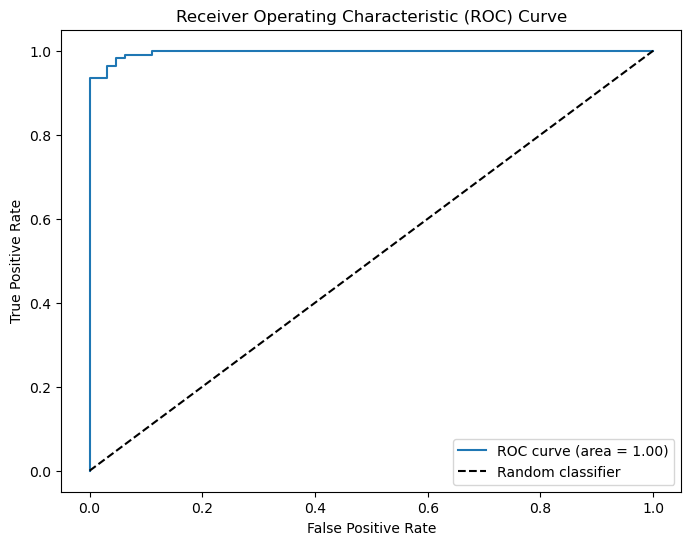

In [30]:
# 8) Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()